# Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Dataset: Bank_Personal_Loan_Modelling-1.csv
Column description: TheraBank_Column_Description.xlsx

In [66]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

In [67]:
df = pd.read_csv( 'Bank_Personal_Loan_Modelling-1.csv')
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

1. Read the column description and ensure you understand each attribute well

In [68]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [69]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [70]:
##Observation on data
#Min experience is showing negative values, which is incorrect, so we have to clean that column 

2. Study the data distribution in each attribute, share your findings. (5 points)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


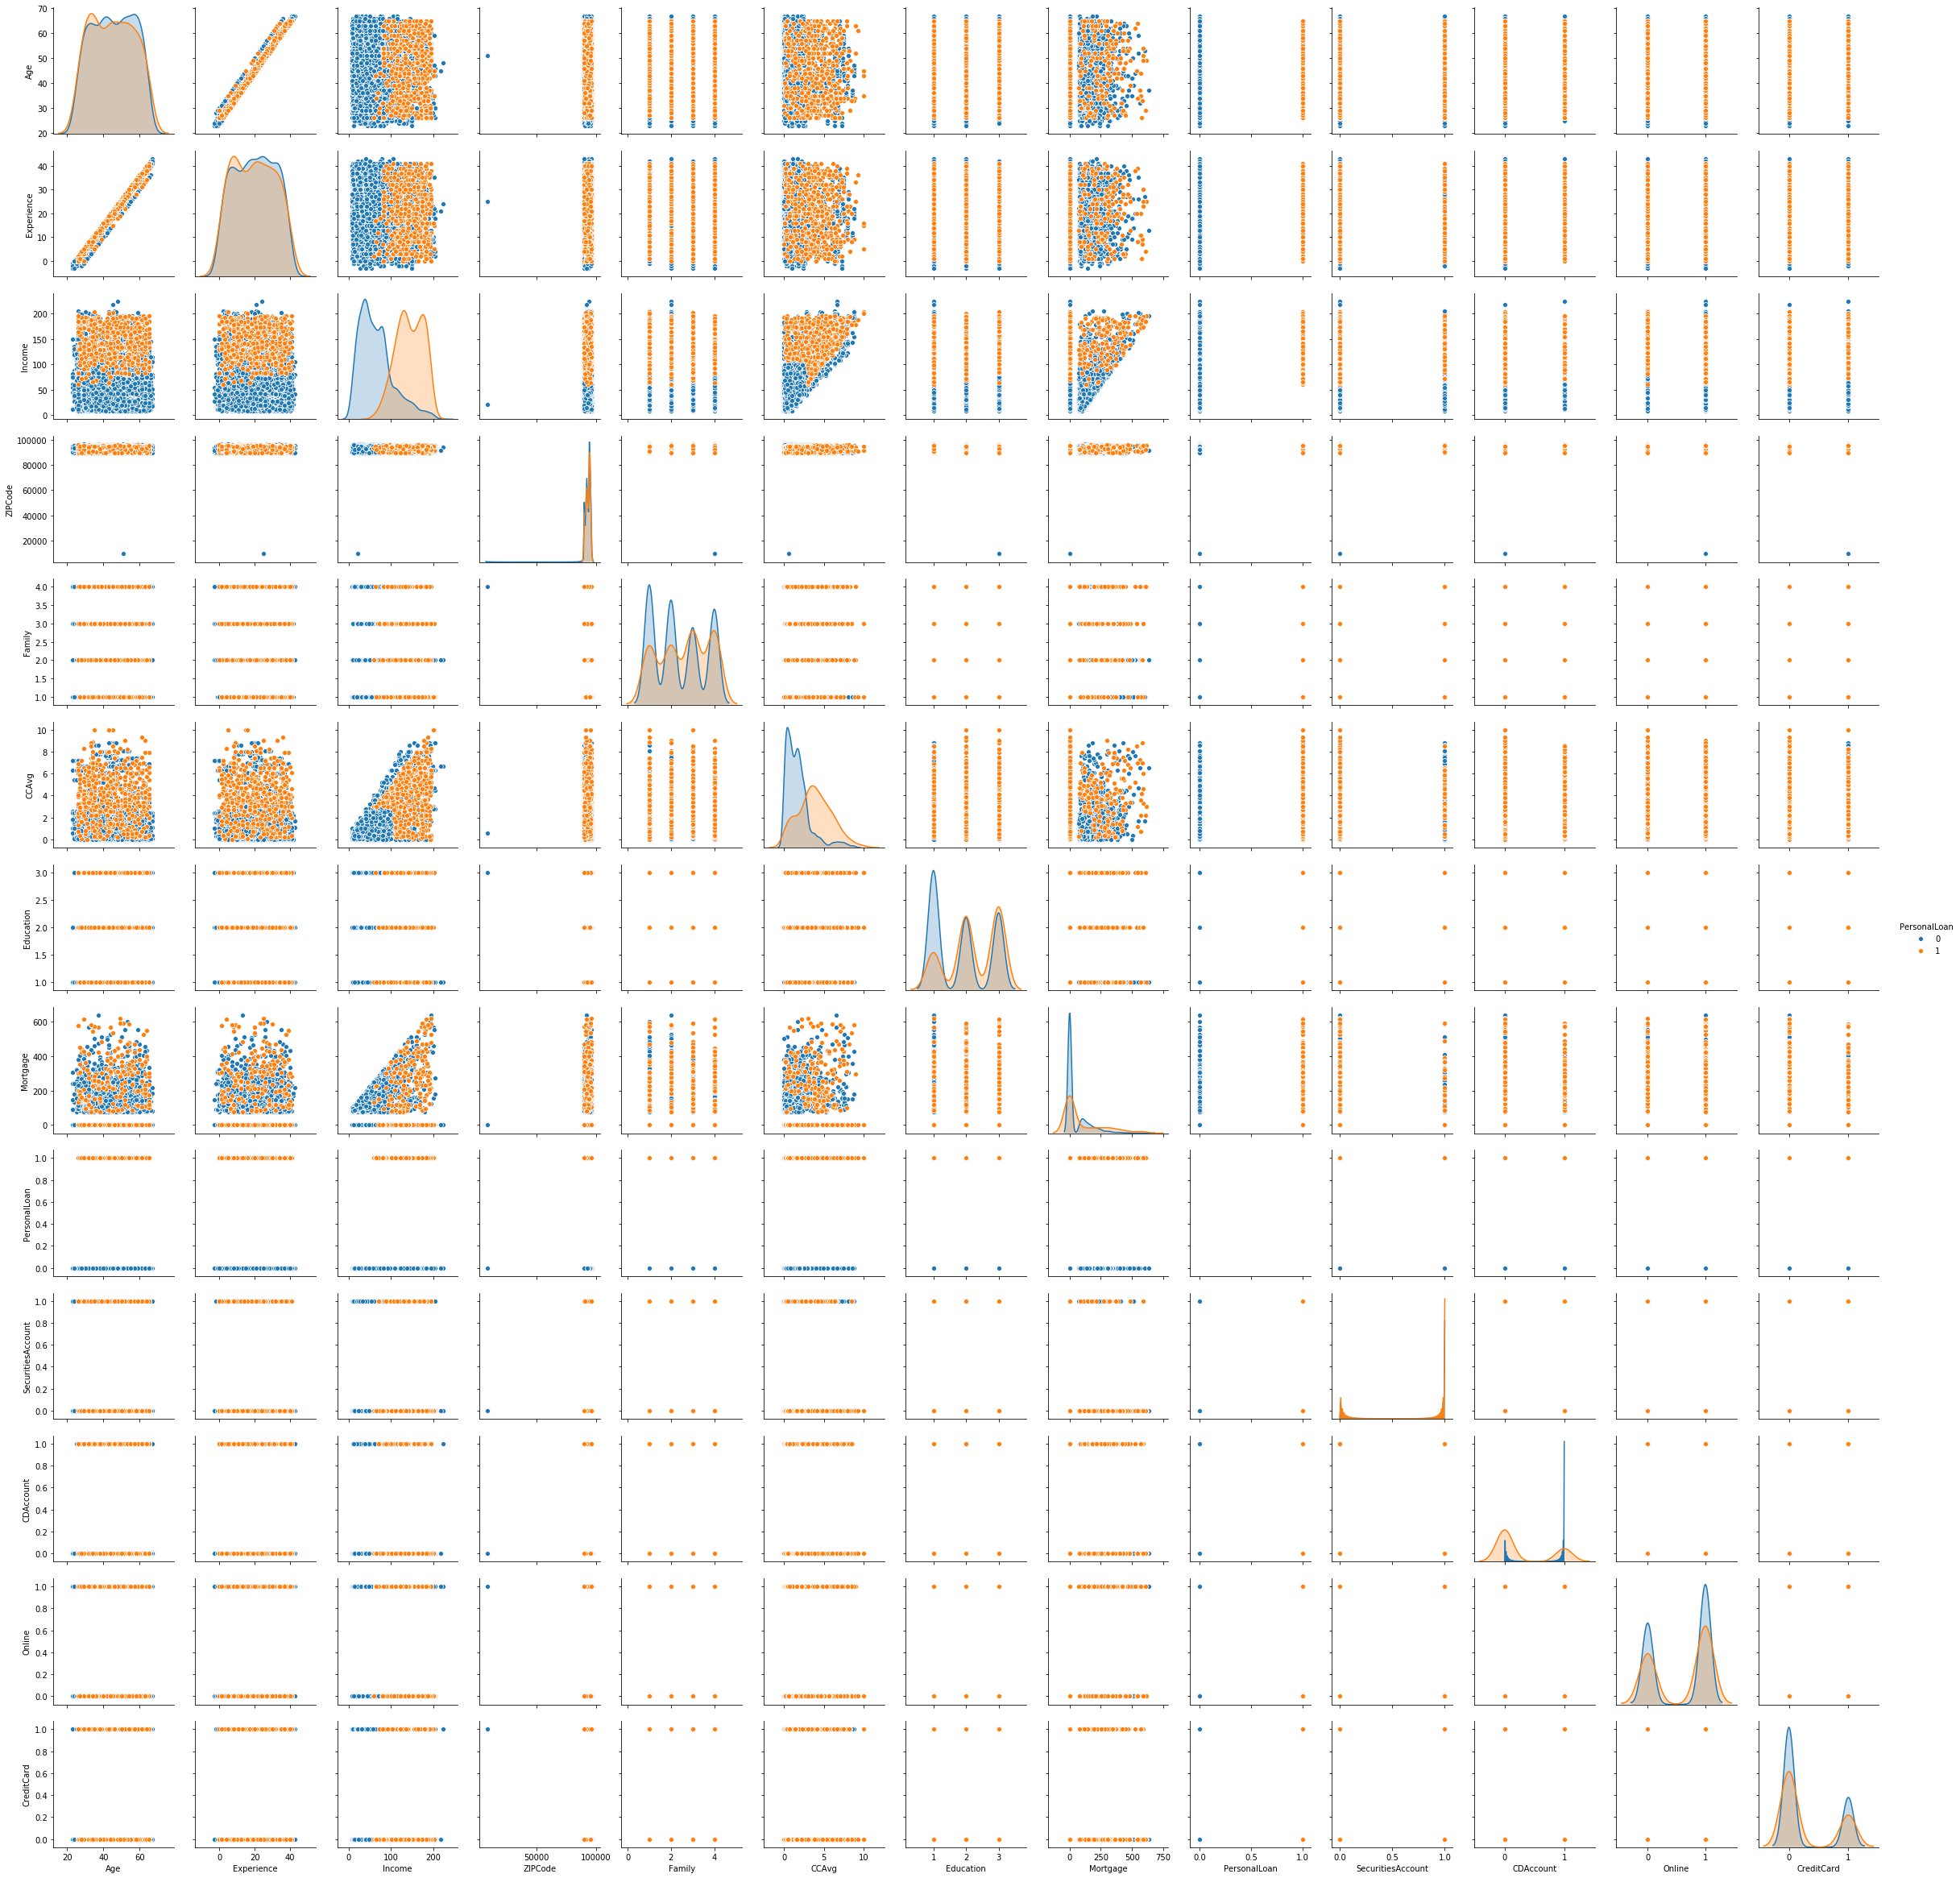

In [71]:
sns.pairplot(df[['Age','Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']], hue = 'PersonalLoan' )


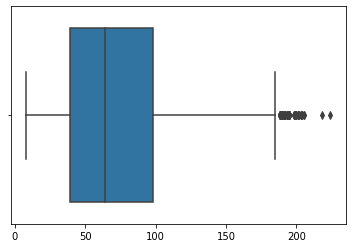

In [72]:
plt = sns.boxplot(df[['Income']])

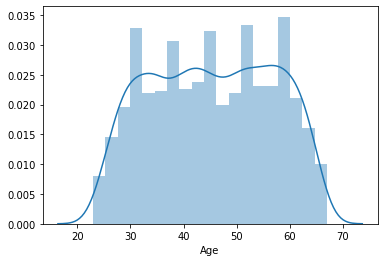

In [73]:
sns.distplot( df['Age'])

In [74]:
# Obsservation
#MOst of the customers fall in the age range of 30 - 60 years and their experience falls in the range of 5 to 35 years 
#and most earn an income between 10K to 100K

In [75]:
# Negative experience cleaning
dfposExp = df.loc[df['Experience'] >0]
mask = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[mask]['ID'].tolist()

In [76]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [77]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


3. Get the target column distribution. Your comments.

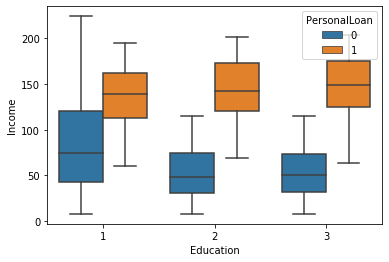

In [78]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=df)

In [79]:
#The box plots show that those with education level 1 have higher incomes. 
#But customers who go for personal loans have the same income distribution regardless of the education level.

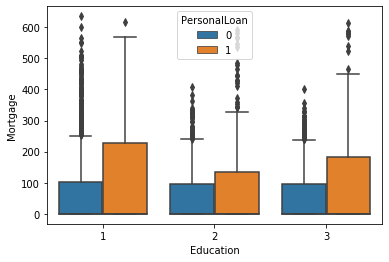

In [80]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=df)

In [81]:
#Customers who taken loan also have higher mortgages.

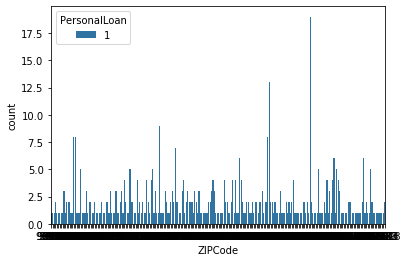

In [82]:
sns.countplot(x="ZIPCode", data=df[df.PersonalLoan==1], hue ="PersonalLoan",orient ='v')

In [83]:
zipcode_top5 = df[df.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5
# Top 5 locations which have availed personal loan before

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

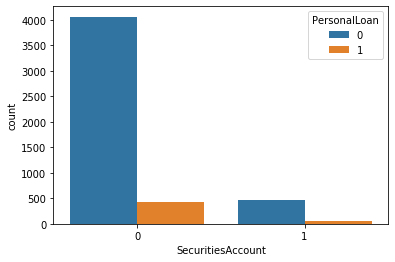

In [84]:
sns.countplot(x="SecuritiesAccount", data=df,hue="PersonalLoan")

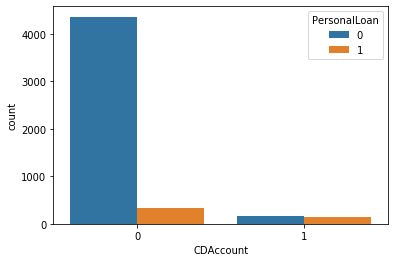

In [85]:
sns.countplot(x="CDAccount", data=df,hue="PersonalLoan")

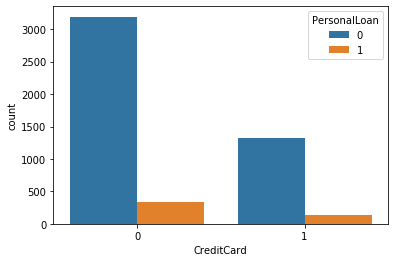

In [86]:
sns.countplot(x="CreditCard", data=df,hue="PersonalLoan")

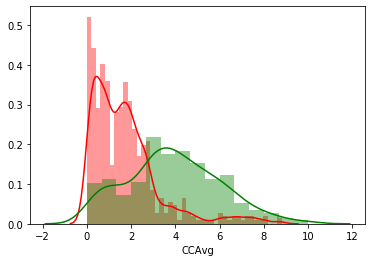

In [87]:
sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

In [88]:
# Customers who have taken personal loan have higher credit card average than those who did nottake. 
# So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

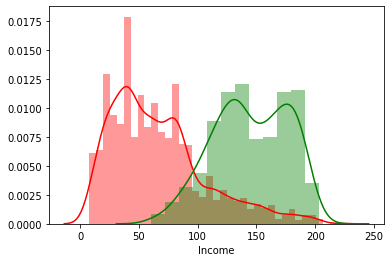

In [89]:
sns.distplot( df[df.PersonalLoan == 0]['Income'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Income'], color = 'g')

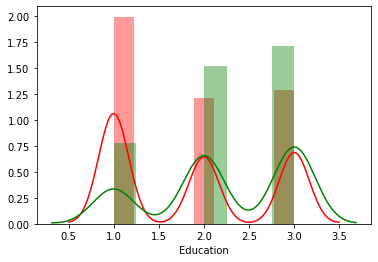

In [90]:
sns.distplot( df[df.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Education'], color = 'g')

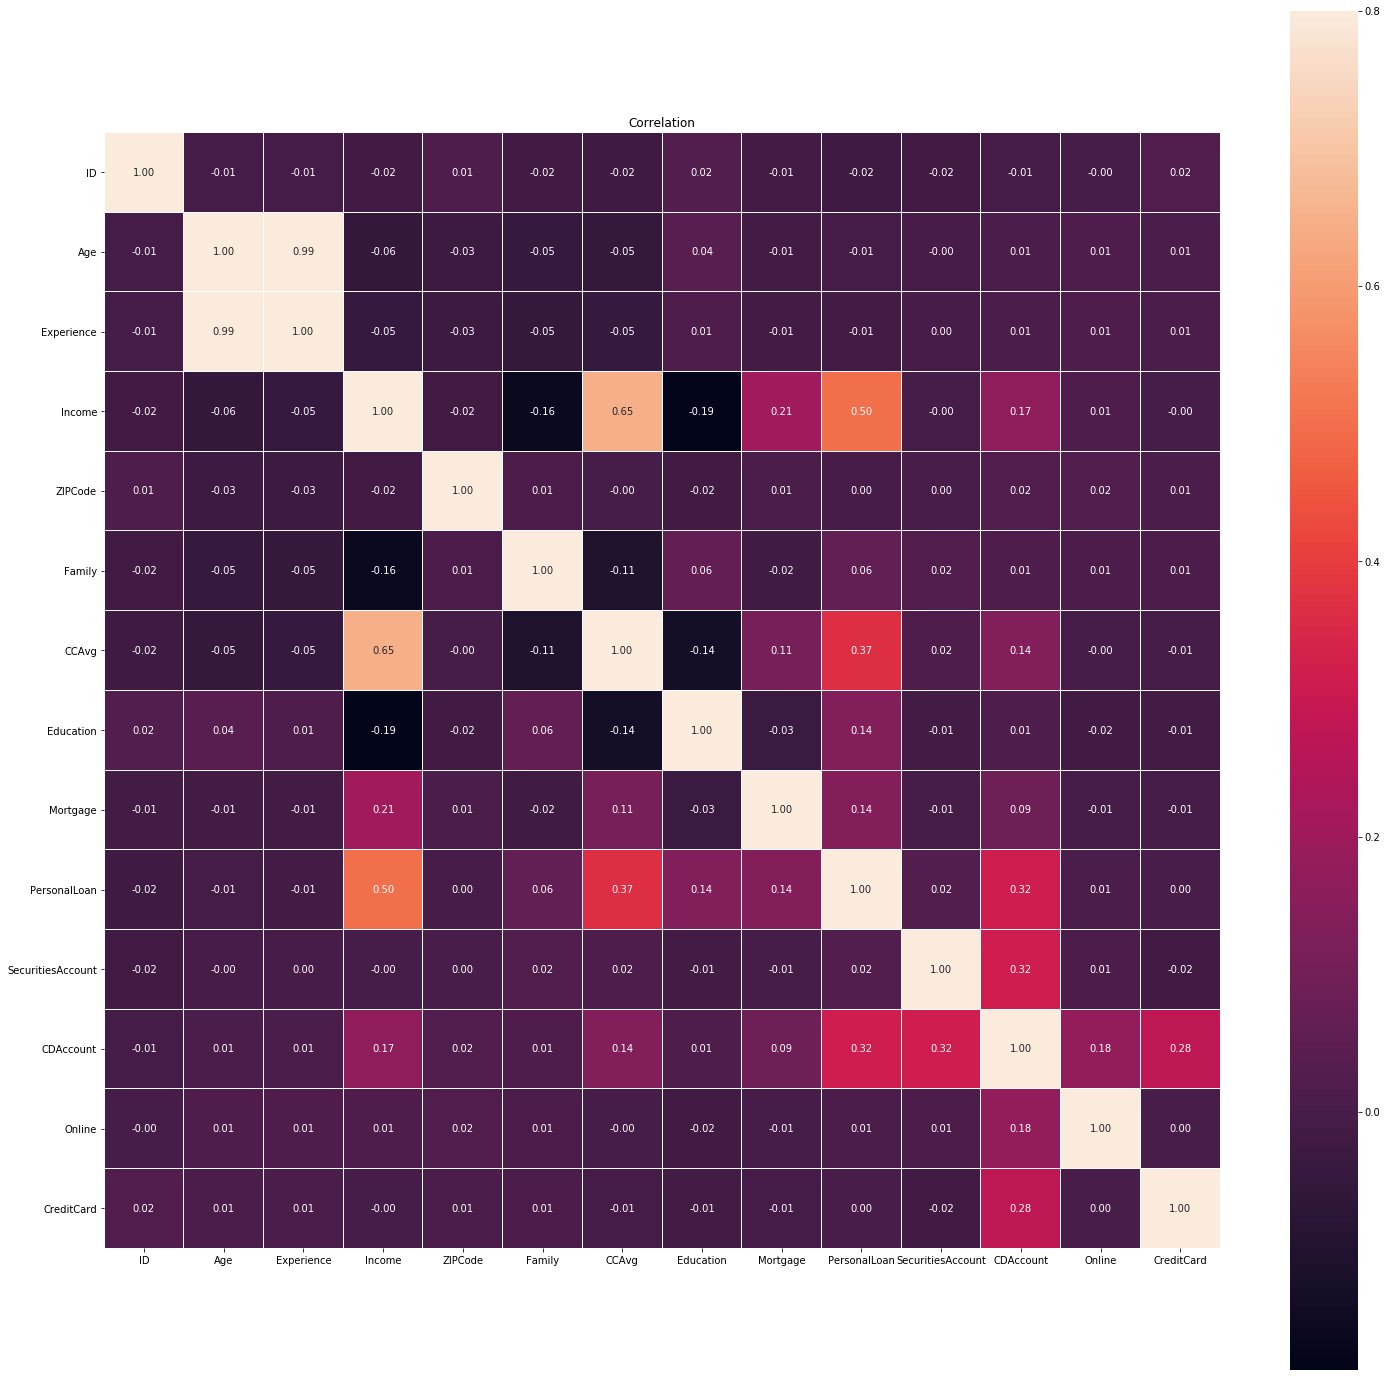

In [91]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [92]:
# 1. Age and Experience is highly corelated
# 2. Income and CCAvg also corelated

4. Split the data into training and test set in the ratio of 70:30 respectively

In [93]:
from sklearn.model_selection import train_test_split
y = df['PersonalLoan']
X = df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)

X_train, X_test,y_train, y_test  = train_test_split(X,y, test_size=0.3 , random_state=1)

In [94]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,3500.0,45.435429,11.507821,23.0,35.0,45.0,55.00,67.0
Income,3500.0,73.640000,46.168251,8.0,39.0,63.0,98.00,224.0
ZIPCode,3500.0,93154.421429,2259.694861,9307.0,91910.0,93555.0,94608.00,96651.0
Family,3500.0,2.395143,1.145654,1.0,1.0,2.0,3.00,4.0
Education,3500.0,1.886286,0.839634,1.0,1.0,2.0,3.00,3.0
Mortgage,3500.0,56.054857,100.523942,0.0,0.0,0.0,100.25,617.0
SecuritiesAccount,3500.0,0.104571,0.306044,0.0,0.0,0.0,0.00,1.0
CDAccount,3500.0,0.062571,0.242225,0.0,0.0,0.0,0.00,1.0
Online,3500.0,0.591143,0.491693,0.0,0.0,1.0,1.00,1.0
CreditCard,3500.0,0.297429,0.457192,0.0,0.0,0.0,1.00,1.0


In [95]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,45.112000,11.358879,23.0,35.0,45.0,55.0,67.0
Income,1500.0,74.087333,45.732111,8.0,39.0,64.0,101.0,202.0
ZIPCode,1500.0,93148.026667,1759.387617,90009.0,92007.0,93305.0,94608.0,96651.0
Family,1500.0,2.399333,1.152715,1.0,1.0,2.0,3.0,4.0
Education,1500.0,1.868667,0.840569,1.0,1.0,2.0,3.0,3.0
Mortgage,1500.0,57.534667,104.464156,0.0,0.0,0.0,102.0,635.0
SecuritiesAccount,1500.0,0.104000,0.305362,0.0,0.0,0.0,0.0,1.0
CDAccount,1500.0,0.055333,0.228706,0.0,0.0,0.0,0.0,1.0
Online,1500.0,0.610000,0.487913,0.0,0.0,1.0,1.0,1.0
CreditCard,1500.0,0.286000,0.452040,0.0,0.0,0.0,1.0,1.0


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)

# Logistic Regression

In [115]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

In [119]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predict_logreg = logreg.predict(X_test)
logreg.score(X_test ,y_test) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9086666666666666

In [120]:
cm_logreg = pd.DataFrame(confusion_matrix(y_test, predict_logreg).T, index=['No', 'Yes'], columns=['No', 'Yes'])

cm_logreg.index.name = 'Predicted'
cm_logreg.columns.name = 'True'
cm_logreg

True,No,Yes
Predicted,,
No,1319,105
Yes,32,44


# K-NN

In [108]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)    
predict_knn = knn.predict(X_test)
acc = accuracy_score(y_test, predict_knn)

In [109]:
print(acc)

0.9


In [112]:
cm_knn = pd.DataFrame(confusion_matrix(y_test, predict_knn).T, index=['No', 'Yes'], columns=['No', 'Yes'])

cm_knn.index.name = 'Predicted'
cm_knn.columns.name = 'True'
cm_knn

True,No,Yes
Predicted,,
No,1348,147
Yes,3,2


# Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

predict_NB = naive_model.predict(X_test)
naive_model.score(X_test,y_test)

0.8973333333333333

In [114]:
cm_nb = pd.DataFrame(confusion_matrix(y_test, predict_NB).T, index=['No', 'Yes'], columns=['No', 'Yes'])

cm_nb.index.name = 'Predicted'
cm_nb.columns.name = 'True'
cm_nb

True,No,Yes
Predicted,,
No,1278,81
Yes,73,68


 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [121]:
#Logistic regression is the best model in this case based on below k-fold cross validations

In [132]:
from sklearn.model_selection import cross_val_score, cross_val_predict

logreg_scores = cross_val_score(logreg, X, y, cv=10)
print("Logistic Regression Cross-validated scores:", logreg_scores)
print("Logistic Regression Average score:" , np.average(logreg_scores))
print("Logistic Regression Median score:" , np.median(logreg_scores))
print("Logistic Regression Standard Deviation" , np.std(logreg_scores))

print ("\n")
knn_scores = cross_val_score(knn, X, y, cv=10)
print("KNN Cross-validated scores:", knn_scores)
print("KNN Average score:" , np.average(knn_scores))
print("KNN Median score:" , np.median(knn_scores))
print("KNN Standard Deviation" , np.std(knn_scores))

print ("\n")
nb_scores = cross_val_score(naive_model, X, y, cv=10)
print("NB Cross-validated scores:", nb_scores)
print("NB Average score:" , np.average(nb_scores))
print("NB Median score:" , np.median(nb_scores))
print("NB Standard Deviation" , np.std(nb_scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Logistic Regression Cross-validated scores: [0.916 0.916 0.908 0.89  0.922 0.908 0.918 0.894 0.912 0.896]
Logistic Regression Average score: 0.9080000000000001
Logistic Regression Median score: 0.91
Logistic Regression Standard Deviation 0.010507140429250966


KNN Cross-validated scores: [0.902 0.908 0.902 0.908 0.9   0.896 0.902 0.89  0.9   0.894]
KNN Average score: 0.9002000000000001
KNN Median score: 0.901
KNN Standard Deviation 0.005400000000000005


NB Cross-validated scores: [0.908 0.884 0.92  0.89  0.914 0.9   0.908 0.888 0.898 0.906]
NB Average score: 0.9016000000000002
NB Median score: 0.903
NB Standard Deviation 0.011128342194594854
